## Final Project Submission

Please fill out:
* Student name: HELLEN SAMUEL
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: NIKITA
* Blog post URL:


In [445]:
# Your code here - remember to use markdown cells for comments as well!
#import standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

THE NUMBERS DATASET

In [446]:
#looking at the data set
budget = pd.read_csv('tn.movie_budgets.csv')
budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [447]:
#getting the information of the above data set
budget.info

<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1  

Changing the columns thatbcontain special characters and changing their type from object to int

In [448]:
#The values for production_budget, domestic_gross and worldwide_gross are strings, clean and convert to floats.
budget['production_budget'] = budget['production_budget'].str.replace('$','').str.replace(',','').astype('float')
budget['domestic_gross'] = budget['domestic_gross'].str.replace('$','').str.replace(',','').astype('float')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace('$','').str.replace(',','').astype('float')

In [449]:
#Changing the type of the columns domestic , production and worldwide from
#Objt to Int

budget['domestic_gross']= pd.to_numeric(budget['domestic_gross'],errors='coerce')
budget['production_budget']= pd.to_numeric(budget['production_budget'],errors='coerce')
budget['worldwide_gross']= pd.to_numeric(budget['worldwide_gross'],errors='coerce')


In [450]:
# Changing the realese date colunm data type from obj to datetime MM/DD/YY


budget['release_date']=pd.to_datetime(budget['release_date'])
budget['release_date']=budget['release_date'].dt.strftime('%m-%d-%Y')
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,12-18-2009,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,05-20-2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,06-07-2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,05-01-2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,12-15-2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [451]:
#Take the converted financial columns and find the profit (worldwide_gross - production_budget) as well as the return on investment (roi).
budget['profit'] = budget['worldwide_gross'] - budget['production_budget']
budget['roi'] = (budget['profit']/budget['production_budget']) 
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,12-18-2009,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,5.532577
1,2,05-20-2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,1.546673
2,3,06-07-2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-0.572108
3,4,05-01-2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,3.243841
4,5,12-15-2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,3.153696
...,...,...,...,...,...,...,...,...
5777,78,12-31-2018,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,-1.000000
5778,79,04-02-1999,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,39.082500
5779,80,07-13-2005,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,-0.732400
5780,81,09-29-2015,A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1.400000e+03,-1.000000


In [452]:
#looking at the changes made
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,12-18-2009,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,5.532577
1,2,05-20-2011,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,1.546673
2,3,06-07-2019,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-0.572108
3,4,05-01-2015,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,3.243841
4,5,12-15-2017,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,3.153696


In [453]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   profit             5782 non-null   float64
 7   roi                5782 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 361.5+ KB


In [454]:
#checking if our dataframe has any missing values
budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
profit               0
roi                  0
dtype: int64

The dataframe is clean as it doesn't have any missing values

IMBD DATASET

In [455]:
import zipfile

with zipfile.ZipFile('zippedData/im.db.zip') as my_zip:
    zipfile.ZipFile.extractall(my_zip, path='ZippedData')

#open up a connection
conn = sqlite3.connect('zippedData/im.db')
#initialize connection
cursor = conn.cursor()

In [456]:
imdbrating =pd.read_sql( """
SELECT name 
FROM sqlite_master 
WHERE type ='table' AND name NOT LIKE 'sqlite_%';
""", conn)

imdbrating



,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [457]:
#checking the movie rating
imdbrating = pd.read_sql("""SELECT * FROM movie_ratings""",conn)
imdbrating.head()


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [458]:
#checking the information in the dataframe
imdbrating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [459]:
#checking if our data has any missing values
imdbrating.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

the movie_ratings data set is clean now we look at movie_basics

In [460]:
imdbtitle = pd.read_sql("""SELECT * FROM movie_basics""",conn)
imdbtitle.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [461]:
#checking the dataframe information
imdbtitle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


correcting the missing values in our dataframe

In [462]:
#dropping the original_title and changing primary_title to movie
imdbtitle = imdbtitle.drop('original_title', 1)
imdbtitle.rename(columns={'primary_title': 'movie'}, inplace=True)

imdbtitle.head(25)


,movie_id,movie,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,2012,82.0,Biography


In [463]:
imdbtitle['movie'].duplicated().sum()

10073

In [464]:
imdbtitle.loc[imdbtitle['movie'].str.contains('Avatar',case=False)]

,movie_id,movie,start_year,runtime_minutes,genres
22,tt0253093,Gangavataran,2018,134.0,None
1795,tt10168040,My Avatar Horse,2012,NaN,Drama
4315,tt10403262,Xbox Avatar Fun,2019,NaN,Action
11392,tt1630029,Avatar 2,2021,NaN,"Action,Adventure,Fantasy"
14612,tt1720145,Les avatars de la mort d'Empédocle,2010,53.0,Documentary
16337,tt1757678,Avatar 3,2023,NaN,"Action,Adventure,Drama"
17060,tt1775309,Avatar,2011,93.0,Horror
20368,tt1854506,Aliens vs. Avatars,2011,80.0,"Horror,Sci-Fi"
34245,tt2271191,Avatars as Prostitutes,2012,51.0,"Animation,Documentary,Drama"
51456,tt3053768,Koormavatara,2011,NaN,Drama


dropping the duplicate rows that we have

In [465]:
imdbtitle.drop_duplicates(subset="movie", keep= False, inplace=True)

In [466]:
imdbtitle['movie'].duplicated().sum()

0

The duplicate rows have been dropped and now we look at the columns

In [467]:
#looking at our columns
imdbtitle.isna()

,movie_id,movie,start_year,runtime_minutes,genres
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,True,False
4,False,False,False,False,False
...,...,...,...,...,...
146139,False,False,False,False,False
146140,False,False,False,True,False
146141,False,False,False,True,False
146142,False,False,False,False,True


In [468]:
imdbtitle.isnull().sum()

movie_id               0
movie                  0
start_year             0
runtime_minutes    28397
genres              4709
dtype: int64

Here we have some missing data in runtime_minutes and genre

In [469]:
#exploring the genre column
imdbtitle['genres'].describe()

count          125180
unique           1058
top       Documentary
freq            30177
Name: genres, dtype: object

In [470]:
imdbt = (imdbtitle['genres'].isnull().sum()
         /len(imdbtitle))*100
print('The percentage of missing genres is {}%'.format(round(imdbt, 2)))

The percentage of missing genres is 3.63%


3.63% of data is missing from our genre column

In [471]:
#replacing the missing values with the most common genre in our data frame which is the Documentary
imdbtitle['genres'] = imdbtitle['genres'].fillna('Documentary')

In [472]:
#confirming if the code worked
imdbtitle.isnull().sum()

movie_id               0
movie                  0
start_year             0
runtime_minutes    28397
genres                 0
dtype: int64

The missing data in genre column has been corrected

In [473]:
# Exploring the runtime column
imdbr = (imdbtitle['runtime_minutes'].isnull().sum()
         /len(imdbtitle))*100
print('The percentage of missing runtime data is {}%'.format(round(imdbr, 2)))

The percentage of missing runtime data is 21.86%


The missing data percentage is 21.86

In [474]:
imdbtitle['runtime_minutes'].describe()

count    101492.000000
mean         86.037924
std         176.204615
min           1.000000
25%          69.000000
50%          86.000000
75%          99.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

In [475]:
imdbtitle.median()

start_year         2015.0
runtime_minutes      86.0
dtype: float64

In [476]:
#Replacing the NaN values  of our dataset with the median column
imdbtitle['runtime_minutes'] = imdbtitle['runtime_minutes'].fillna(imdbtitle['runtime_minutes'].median())

In [477]:
#Confirming our code
imdbtitle.isnull().sum()

movie_id           0
movie              0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

The missing values in runtime_minutes are now okay

In [478]:
#let's check our Data Frame
imdbtitle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129889 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         129889 non-null  object 
 1   movie            129889 non-null  object 
 2   start_year       129889 non-null  int64  
 3   runtime_minutes  129889 non-null  float64
 4   genres           129889 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 5.9+ MB


In [479]:
#previewing the persons table
q3 = pd.read_sql("""
SELECT *
FROM persons
;
""",conn)
q3.head()


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


MERGING DATAFRAMES

In [480]:
# let's merge our dataframes, lets start first with our IMDB dataframes , imdbtitle and imdb rating
imdbdata = pd.merge(left=imdbtitle, right=imdbrating, on="movie_id")

In [481]:
imdbdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64842 entries, 0 to 64841
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         64842 non-null  object 
 1   movie            64842 non-null  object 
 2   start_year       64842 non-null  int64  
 3   runtime_minutes  64842 non-null  float64
 4   genres           64842 non-null  object 
 5   averagerating    64842 non-null  float64
 6   numvotes         64842 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


In [482]:
imdbdata.head()

,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,2018,86.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


Checking for outliers

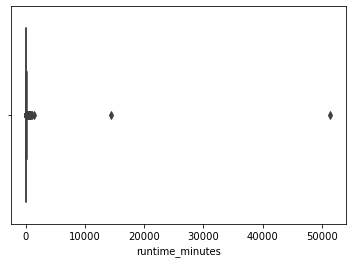

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(data=imdbdata, x='runtime_minutes')

# Save the boxplot as a PNG image
plt.savefig('boxplot.png')

In [488]:
#dropping the outliers
imdbdata = imdbdata.loc[(imdbdata.runtime_minutes <= 200) & (imdbdata.runtime_minutes >= 30)]

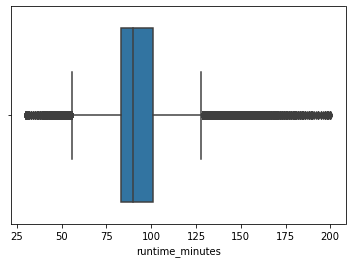

In [489]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(data=imdbdata, x='runtime_minutes')

# Save the boxplot as a PNG file
plt.savefig('boxplot.png')

# Show the plot
plt.show()

ROTTEN TOMATOES DATASET


In [ ]:
#read the csv files
reviews = pd.read_csv('rt.reviews.tsv',sep="\t", encoding = 'unicode_escape')
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [ ]:
movies_info = pd.read_table('rt.movie_info.tsv', encoding='unicode_escape')
movies_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
reviews.drop_duplicates(inplace = True)

In [ ]:
reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [ ]:
reviews.tail()

,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


In [ ]:
movies_info.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [ ]:
movies_info.shape

(1560, 12)

BOX OFFICE MOJO

It provides the lifetime highest gross movies and this dataset has been restricted from 2010 to present. This information will be useful to find the top grossing movies and insights we can make from why they are the top gross movies.

In [ ]:
# Here you run your code to explore the data
bom_movie = pd.read_csv('bom.movie_gross.csv')
bom_movie.head(10)



,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [ ]:
#check the data info
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
#check for missing data 
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

DATA MODELLING

we are plotting the findings for easier readability
starting with box office mojo

In [ ]:
x = bom_movie['foreign_gross']
y = bom_movie['domestic_gross']

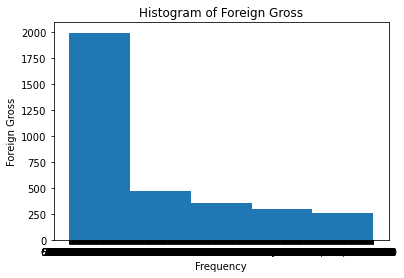

In [ ]:
plt.xlabel('Frequency')
plt.ylabel('Foreign Gross')
plt.title('Histogram of Foreign Gross')

plt.hist(x, bins=5)
plt.show() 


c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


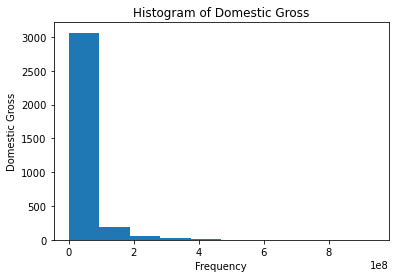

In [ ]:
plt.xlabel('Frequency')
plt.ylabel('Domestic Gross')
plt.title('Histogram of Domestic Gross')

plt.hist(y)
plt.show() 


conclusion

Both the domestic and foreign gross seems to be normally distributed with a right skew